In [2]:
import naive_kmp
import numba_kmp
import taichi_kmp

[Taichi] version 1.7.0, llvm 15.0.4, commit 2fd24490, linux, python 3.11.4


[I 03/11/24 17:24:15.716 4588] [shell.py:_shell_pop_print@23] Graphical python shell detected, using wrapped sys.stdout


[Taichi] Starting on arch=x64


In [107]:
from time import time
import numpy as np
import cProfile
from tqdm import tqdm
import matplotlib.pyplot as plt

In [113]:
# in milliseconds
def evaluate_time(func, *args):
    s_t = time()
    func(*args)
    e_t = time()
    return round((e_t - s_t) * 1000, 7)

In [114]:
def time_sequence_measure(func, pattern_len):
    trials = 1000 

    sequence_len = 0
    seq_extend_len = pattern_len * 2 
    saved_seql = []
    saved_t = []

    for i in tqdm(range(trials)):
        sequence_len += seq_extend_len
        test_sequence = np.random.randint(0, sequence_len, sequence_len)
        test_pattern = np.random.randint(0, pattern_len, pattern_len)
        elapsed_t = evaluate_time(func, test_sequence, test_pattern)
        
        saved_seql.append(sequence_len)
        saved_t.append(elapsed_t)

    return saved_seql, saved_t

def time_pattern_measure(func, sequence_len):
    
    pattern_len = 0
    ptr_extend_len = 20
    saved_ptrl = []
    saved_t = []

    trials = sequence_len // ptr_extend_len

    for i in tqdm(range(trials)):
        pattern_len += ptr_extend_len
        test_sequence = np.random.randint(0, sequence_len, sequence_len)
        test_pattern = np.random.randint(0, pattern_len, pattern_len)

        elapsed_t = evaluate_time(func, test_sequence, test_pattern)
        
        saved_ptrl.append(pattern_len)
        saved_t.append(elapsed_t)

    return saved_ptrl, saved_t

In [230]:
def my_plot(x, y, x_label, y_label):
    plt.figure(figsize=(5,4))
    plt.plot(x, y)
    plt.xlabel(x_label)
    plt.ylabel(y_label)
    plt.xticks(rotation=45)
    plt.grid()
    plt.show()

In [242]:
np.mean([ n / o for o, n in zip(o_ptrt, n_ptrt)])

80.54020106969926

In [243]:
np.mean([ n / o for o, n in zip(o_seqt, n_seqt)])

98.9999188444268

100%|██████████| 1000/1000 [00:01<00:00, 510.61it/s]


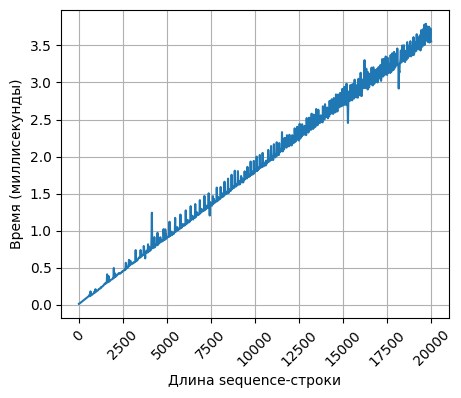

In [231]:
n_seql, n_seqt = time_sequence_measure(naive_kmp.kmp, 10)
my_plot(n_seql, n_seqt, "Длина sequence-строки", "Время (миллисекунды)")

100%|██████████| 1000/1000 [00:06<00:00, 163.25it/s]


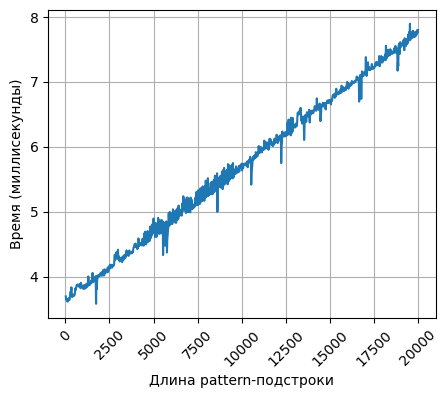

In [232]:
n_ptrl, n_ptrt = time_pattern_measure(naive_kmp.kmp, 20000)
my_plot(n_ptrl, n_ptrt, "Длина pattern-подстроки", "Время (миллисекунды)")

100%|██████████| 1000/1000 [00:00<00:00, 7317.64it/s]


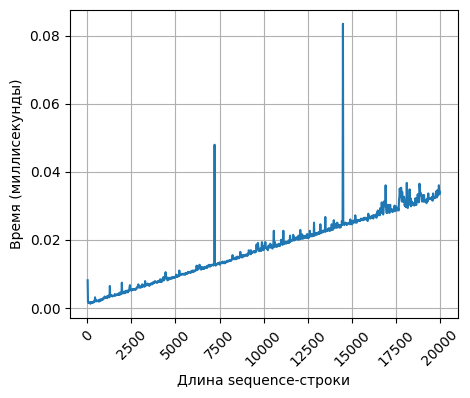

In [233]:
o_seql, o_seqt = time_sequence_measure(numba_kmp.kmp, 10)
my_plot(o_seql, o_seqt, "Длина sequence-строки", "Время (миллисекунды)")

100%|██████████| 1000/1000 [00:00<00:00, 2309.40it/s]


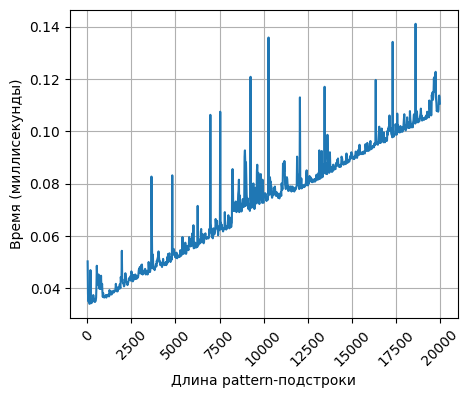

In [234]:
o_ptrl, o_ptrt = time_pattern_measure(numba_kmp.kmp, 20000)
my_plot(o_ptrl, o_ptrt, "Длина pattern-подстроки", "Время (миллисекунды)")

In [235]:
def my_plotcompare(n_x, n_y, o_x, o_y, x_label, y_label, y_max):
    plt.figure(figsize=(5,4))
    plt.plot(n_x, n_y, label='наивный')
    plt.plot( o_x, o_y, label='оптимизированный')
    plt.xlabel(x_label)
    plt.ylabel(y_label)
    plt.xticks(rotation=45)
    plt.legend()

    plt.vlines(n_x[50::150], 0, y_max, linestyles='dashed', colors='red', alpha=0.5)

    for xi, yi, txti in zip(n_x[50::150], n_y[50::150], list(map(lambda v: str(round(v, 3)), n_y[50::150]))):
        plt.text(xi - 500, yi + 0.5, txti)
        plt.scatter(xi,yi, color='red')
    
    for xi, yi, txti in zip(o_x[50::150], o_y[50::150], list(map(lambda v: str(round(v, 3)), o_y[50::150]))):
        plt.text(xi - 500, yi + 0.2, txti)
        plt.scatter(xi,yi, color='red')

    plt.grid()
    plt.show()


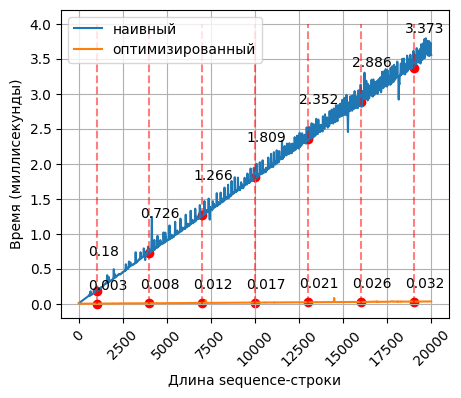

In [238]:
my_plotcompare(n_seql, n_seqt, o_seql, o_seqt, "Длина sequence-строки", "Время (миллисекунды)", 4)

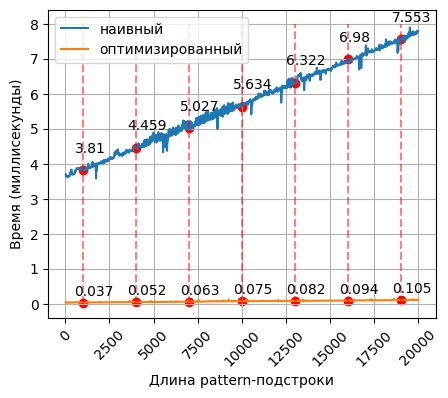

In [239]:
my_plotcompare(n_ptrl, n_ptrt, o_ptrl, o_ptrt, "Длина pattern-подстроки", "Время (миллисекунды)", 8)